In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
#rainfall_df = pd.read_csv('../../DATA/rainfall/Hourly.csv')  # Make sure the file is in your working directory

rainfall_df = pd.read_csv('../../DATA/rainfall/EPM_hourly/EPM_houry.csv')  # Make sure the file is in your working directory



In [6]:
rainfall_df.head(2)

,Fecha,P_Manantiales,P_Chorrillos,P_San_Antonio_Prado,P_Villa_Hermosa,P_San_Cristobal,P_Ayura,P_Cucaracho,P_Astilleros,P_El_Convento,P_Pedregal,P_Gerona,P_Miguel_Aguinaga
0,1948-03-27 00:00:00,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1948-03-27 01:00:00,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
rainfall_df.head(2)

,Fecha,Station_1,Station_2,Station_3,Station_4,Station_5,Station_6,Station_7,Station_8,Station_9,...,Station_148,Station_149,Station_150,Station_151,Station_152,Station_153,Station_154,Station_155,Station_156,Station_157
0,1948-01-01 00:00:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1948-01-01 01:00:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
# Select columns containing the word 'rainfall'
rainfall_columns = df.filter(like='Station').columns
print(rainfall_columns)


Index(['Station_1', 'Station_2', 'Station_3', 'Station_4', 'Station_5',
       'Station_6', 'Station_7', 'Station_8', 'Station_9', 'Station_10',
       ...
       'Station_148', 'Station_149', 'Station_150', 'Station_151',
       'Station_152', 'Station_153', 'Station_154', 'Station_155',
       'Station_156', 'Station_157'],
      dtype='object', length=157)


In [75]:
# Calculate the average of the rainfall columns for each hour
rainfall_df['average_rainfall'] = df[rainfall_columns].mean(axis=1)


In [76]:
rainfall_df['Fecha'] = pd.to_datetime(df['Fecha'])


In [77]:
# Resample the data to daily frequency and calculate the daily average rainfall
daily_average_rainfall = rainfall_df.resample('D', on='Fecha')['average_rainfall'].mean()


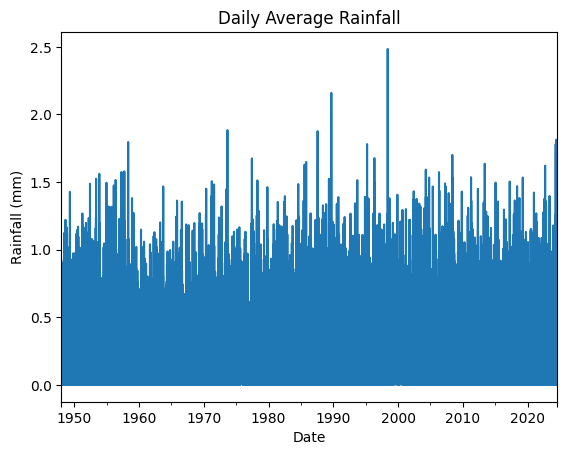

In [78]:
# Plot the daily average rainfall
daily_average_rainfall.plot(kind='line')
plt.title('Daily Average Rainfall')
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.show()

In [79]:

# Load the ONI data from the uploaded Excel file
oni_file_path = '../../DATA/rainfall/ENSO/ONI.xlsx'
oni_df = pd.read_excel(oni_file_path)

# First, let's reshape the ONI dataframe to assign ONI values to each month.
# The ONI dataframe has one row per year and 12 columns representing overlapping three-month periods.
# We will assign each month an ONI value corresponding to its nearest period.

# Extract year and month from the timestamp to merge with ONI data
rainfall_df['Year'] = rainfall_df['Fecha'].dt.year
rainfall_df['Month'] = rainfall_df['Fecha'].dt.month

# Reshape ONI data (the reshaping step you saw earlier)
oni_melted = oni_df.melt(id_vars=['Year'], var_name='Period', value_name='ONI')

month_from_period = {
    'DJF': 1, 'JFM': 2, 'FMA': 3, 'MAM': 4, 'AMJ': 5, 'MJJ': 6,
    'JJA': 7, 'JAS': 8, 'ASO': 9, 'SON': 10, 'OND': 11, 'NDJ': 12
}
oni_melted['Month'] = oni_melted['Period'].map(month_from_period)

def classify_oni(oni_value):
    if oni_value >= 0.5:
        return 'El Niño'
    elif oni_value <= -0.5:
        return 'La Niña'
    else:
        return 'Neutral'

oni_melted['ONI_Category'] = oni_melted['ONI'].apply(classify_oni)

# Merge ONI data with the rainfall data
merged_df = pd.merge(rainfall_df, oni_melted[['Year', 'Month', 'ONI_Category']], on=['Year', 'Month'], how='left')

# Identify the rainfall columns (assuming they are named similarly, e.g., 'station1', 'station2', etc.)
rainfall_columns = [col for col in merged_df.columns if 'Station' in col]  # Adjust this filter to match your column names

# Calculate the average rainfall across all stations for each row (hourly average)
merged_df['average_rainfall'] = merged_df[rainfall_columns].mean(axis=1)

# Now, group by date and ONI category to calculate the daily average rainfall
merged_df['Date'] = merged_df['Fecha'].dt.date  # Create a column for the date
daily_avg_rainfall = merged_df.groupby(['Date', 'ONI_Category'])['average_rainfall'].mean().reset_index()


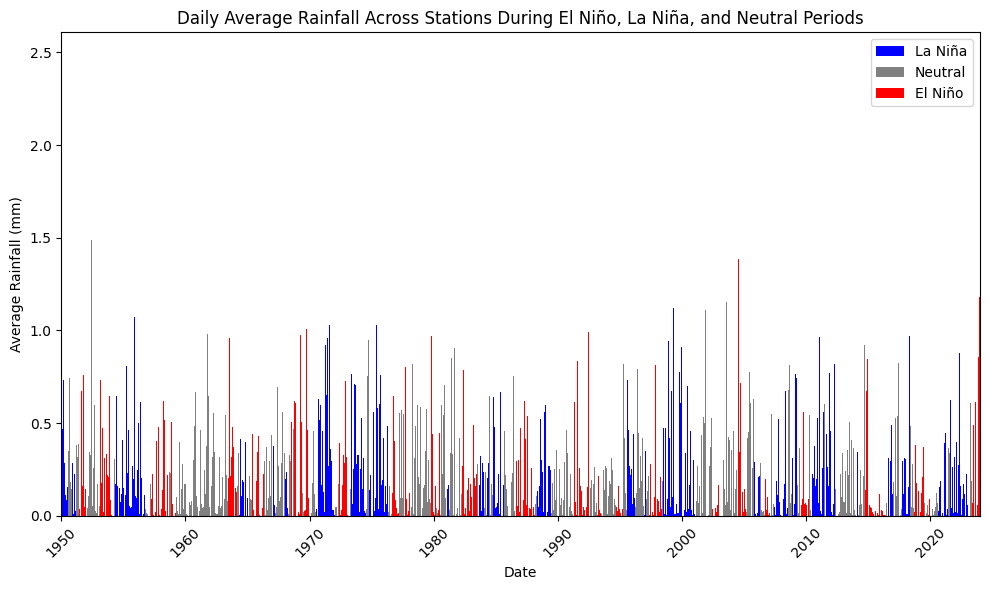

In [67]:
# Plot the daily average rainfall for each ONI category
plt.figure(figsize=(10, 6))

# Define color mapping for each ONI category
color_mapping = {
    'La Niña': 'blue',
    'El Niño': 'red',
    'Neutral': 'gray'
}

# Loop through each ONI category and plot bars for daily average rainfall
for category in daily_avg_rainfall['ONI_Category'].unique():
    subset = daily_avg_rainfall[daily_avg_rainfall['ONI_Category'] == category]
    plt.bar(subset['Date'], subset['average_rainfall'], label=category, 
            color=color_mapping[category], width=1)

# Add plot title and labels
plt.title('Daily Average Rainfall Across Stations During El Niño, La Niña, and Neutral Periods')
plt.xlabel('Date')
plt.ylabel('Average Rainfall (mm)')

# Set x-axis limits (replace with your specific min/max dates)
plt.xlim(pd.Timestamp('1950-01-01'), pd.Timestamp('2023-12-31'))  # Example: pd.Timestamp('2021-01-01'), pd.Timestamp('2021-12-31')


# Add a legend
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to avoid cutting off labels
plt.tight_layout()

# Show the plot
plt.show()

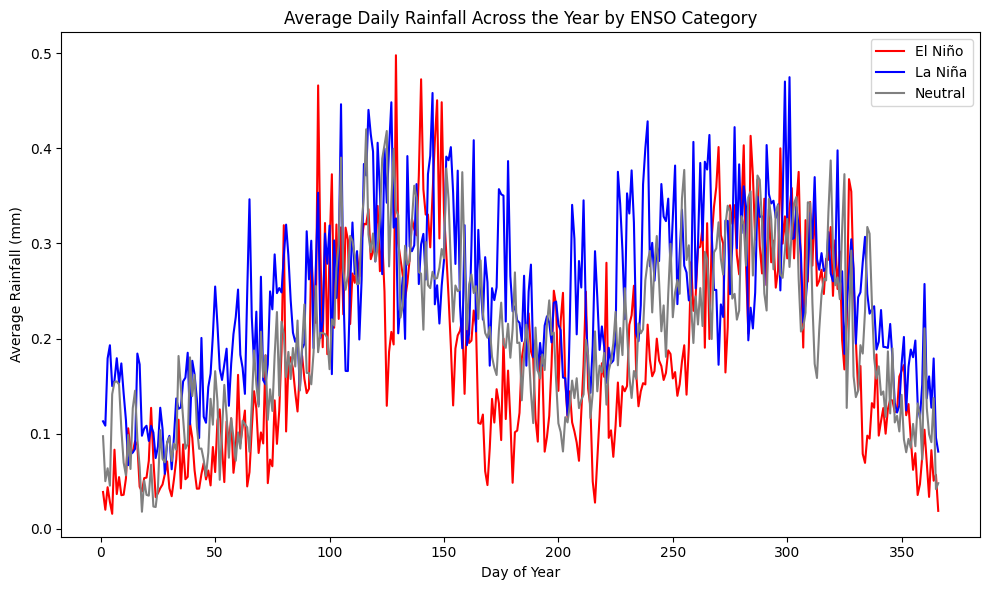

In [45]:
# Step 1: Convert 'Fecha' to datetime format if not already done
merged_df['Fecha'] = pd.to_datetime(merged_df['Fecha'])

# Step 2: Extract the day of the year from 'Fecha'
merged_df['DayOfYear'] = merged_df['Fecha'].dt.dayofyear

# Step 3: Group by day of the year and ONI category, then calculate the average rainfall
daily_avg_by_enso = merged_df.groupby(['DayOfYear', 'ONI_Category'])['average_rainfall'].mean().reset_index()

# Step 4: Plot the results

# Create a figure for the plot
plt.figure(figsize=(10, 6))

# Define color mapping for each ONI category
color_mapping = {
    'La Niña': 'blue',
    'El Niño': 'red',
    'Neutral': 'gray'
}

# Plot each ONI category with the specified color
for category in daily_avg_by_enso['ONI_Category'].unique():
    subset = daily_avg_by_enso[daily_avg_by_enso['ONI_Category'] == category]
    plt.plot(subset['DayOfYear'], subset['average_rainfall'], label=category, color=color_mapping[category])

# Add plot title and labels
plt.title('Average Daily Rainfall Across the Year by ENSO Category')
plt.xlabel('Day of Year')
plt.ylabel('Average Rainfall (mm)')

# Add a legend to distinguish the lines
plt.legend()

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()

In [80]:
# Load the landslide inventory CSV file to inspect its structure and find relevant date columns
landslide_file_path = '../../DATA/landslides/inventory_GEOHAZARDS_20240824.csv'

# Load the landslide data
landslide_df = pd.read_csv(landslide_file_path)

In [81]:
# Convert the 'Fecha' column to datetime format
landslide_df['Fecha'] = pd.to_datetime(landslide_df['Fecha'], errors='coerce')

# Remove rows with invalid dates
landslide_df = landslide_df.dropna(subset=['Fecha'])

# Extract the day of the year from 'Fecha'
landslide_df['DayOfYear'] = landslide_df['Fecha'].dt.dayofyear

# Count the number of landslides for each day of the year
landslide_count_by_day = landslide_df.groupby('DayOfYear').size().reset_index(name='LandslideCount')

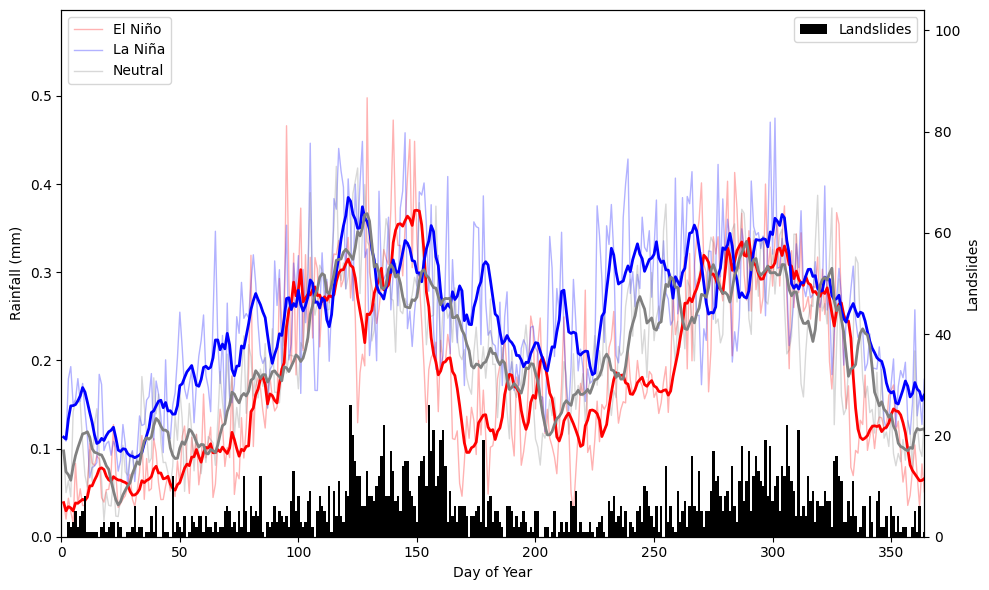

In [82]:
# Create the combined plot with rainfall and landslide count
fig, ax1 = plt.subplots(figsize=(10, 6))

# Step 1: Plot the average daily rainfall for each ONI category with high transparency
for category in daily_avg_by_enso['ONI_Category'].unique():
    subset = daily_avg_by_enso[daily_avg_by_enso['ONI_Category'] == category]
    ax1.plot(subset['DayOfYear'], subset['average_rainfall'], label=f'{category}', 
             color=color_mapping[category], linewidth=1, alpha=0.3)  # High transparency

# Step 2: Calculate the 7-day moving average for each category and plot it with higher opacity
for category in daily_avg_by_enso['ONI_Category'].unique():
    subset = daily_avg_by_enso[daily_avg_by_enso['ONI_Category'] == category].copy()
    subset['7_day_moving_avg'] = subset['average_rainfall'].rolling(window=7, min_periods=1).mean()  # 7-day moving average
    ax1.plot(subset['DayOfYear'], subset['7_day_moving_avg'],
             color=color_mapping[category], linewidth=2)  # Higher opacity


# Set y-axis limit for rainfall based on its range
ax1.set_ylabel('Rainfall (mm)')
ax1.set_ylim(0, daily_avg_by_enso['average_rainfall'].max() * 1.2)  # Add some margin to the limit

# Set the x-axis limit to 0 to 364
ax1.set_xlim(0, 364)

# Create a second y-axis for landslide count
ax2 = ax1.twinx()
ax2.bar(landslide_count_by_day['DayOfYear'], landslide_count_by_day['LandslideCount'], 
        color='black', label='Landslides', width=1)

# Set y-axis limit for landslides based on its range
ax2.set_ylabel('Landslides')
ax2.set_ylim(0, landslide_count_by_day['LandslideCount'].max() * 4)  # Add some margin to the limit

# Add plot title and labels
ax1.set_xlabel('Day of Year')

# Add legends for each plot
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

plt.savefig('../../FIGURES/temporal_analysis/daily_ENSO.png', dpi=500, format='png', bbox_inches='tight')

# Show the plot
plt.show()

In [85]:
# Assuming 'merged_df' contains 'Fecha', 'average_rainfall', and 'ONI_Category'
# Also assuming 'rainfall_columns' contains the names of the rainfall station columns

# Step 1: Filter for rainfall > 0 for each station on a given day
# Calculate the average rainfall only considering non-zero rainfall values per station
merged_df['average_rainfall_nonzero'] = merged_df[rainfall_columns].apply(lambda x: x[x > 0].mean(), axis=1)

# Step 2: Filter out days where no station recorded rainfall (all NaNs after the above step)
non_zero_rainfall_df = merged_df.dropna(subset=['average_rainfall_nonzero'])

# Step 2: Extract the day of the year (if not done)
non_zero_rainfall_df['DayOfYear'] = non_zero_rainfall_df['Fecha'].dt.dayofyear

# Step 3: Group by DayOfYear and ONI_Category to calculate the average rainfall
daily_avg_by_enso = non_zero_rainfall_df.groupby(['DayOfYear', 'ONI_Category'])['average_rainfall_nonzero'].mean().reset_index()

# Step 4: Calculate the 7-day moving average
daily_avg_by_enso['7_day_moving_avg'] = daily_avg_by_enso.groupby('ONI_Category')['average_rainfall_nonzero'].transform(lambda x: x.rolling(window=7, min_periods=1).mean())

C:\Users\edier\AppData\Local\Temp\ipykernel_25020\1042268514.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_zero_rainfall_df['DayOfYear'] = non_zero_rainfall_df['Fecha'].dt.dayofyear


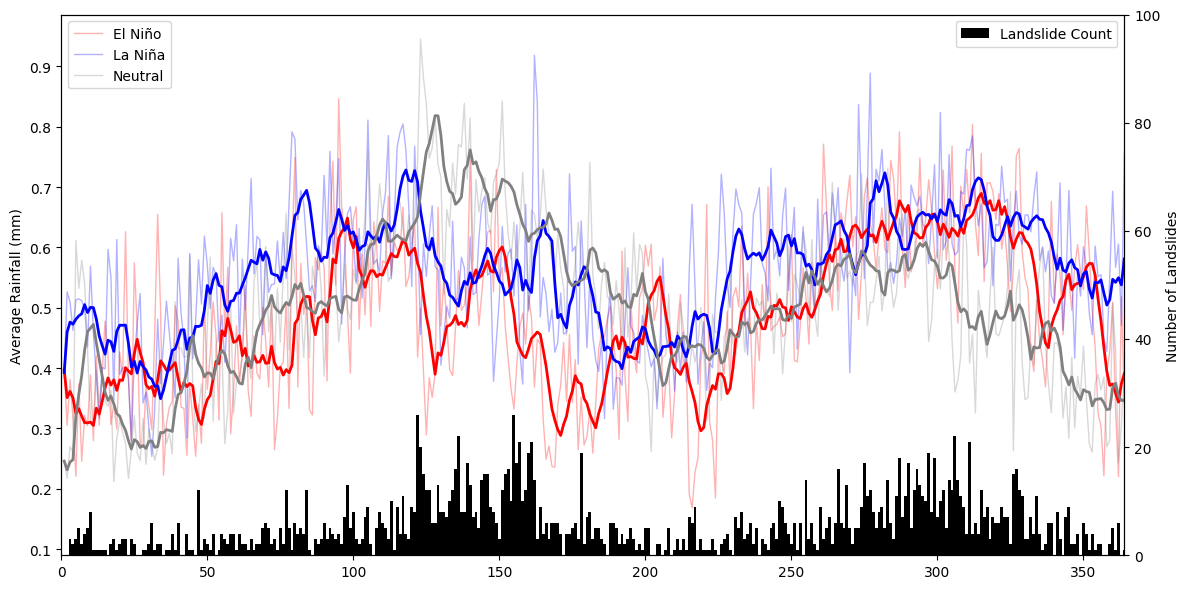

In [88]:
# Step 5: Create the plot

# Define color mapping for each ENSO category
color_mapping = {
    'La Niña': 'blue',
    'El Niño': 'red',
    'Neutral': 'gray'
}

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot transparent lines for daily rainfall by ENSO category
for category in daily_avg_by_enso['ONI_Category'].unique():
    subset = daily_avg_by_enso[daily_avg_by_enso['ONI_Category'] == category]
    ax1.plot(subset['DayOfYear'], subset['average_rainfall_nonzero'], label=f'{category}', 
             color=color_mapping[category], alpha=0.3, linewidth=1)  # Transparent lines

# Plot 7-day moving average for each ENSO category
for category in daily_avg_by_enso['ONI_Category'].unique():
    subset = daily_avg_by_enso[daily_avg_by_enso['ONI_Category'] == category]
    ax1.plot(subset['DayOfYear'], subset['7_day_moving_avg'], 
             color=color_mapping[category], linewidth=2)  # More visible lines

# Set the labels and title for the rainfall axis
ax1.set_ylabel('Average Rainfall (mm)')

# Step 6: Add the landslide count as black bars on a secondary y-axis
ax2 = ax1.twinx()  # Create a secondary y-axis
ax2.bar(landslide_count_by_day['DayOfYear'], landslide_count_by_day['LandslideCount'], 
        color='black', width=1, label='Landslide Count')

ax2.set_ylim(0, 100)

# Set the labels for the landslide axis
ax2.set_ylabel('Number of Landslides')

# Step 7: Add legends and formatting
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Set x-axis limits to show the full year
ax1.set_xlim(0, 364)

# Show plot with tight layout
plt.tight_layout()
plt.show()